<span style='background:yellow'>MOVIE RECOMMENDATION SYSTEM</span>


In [8]:
#importing libraries
import numpy as np
import pandas as pd



In [9]:
#reading the dataset(ratings)
x = pd.read_csv('C:\\Users\\DELL\OneDrive\\Desktop\\dataset1.csv')




In [10]:
#reading the dataset(movies)
y = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\dataset2.csv',encoding='latin1')


<span style='background:yellow'>DATASET</span>

In [12]:
#merging datasets
df= pd.merge(x,y,on='movieId')
df.head(10)



,userId,movieId,rating,timestamp,title
0,1,169,2.5,1204927694,Free Willy 2: The Adventure Home (1995)
1,13,169,1.0,974868393,Free Willy 2: The Adventure Home (1995)
2,14,169,3.0,845470321,Free Willy 2: The Adventure Home (1995)
3,17,169,1.0,944991371,Free Willy 2: The Adventure Home (1995)
4,68,169,1.0,1011092044,Free Willy 2: The Adventure Home (1995)
5,178,169,2.5,1140216232,Free Willy 2: The Adventure Home (1995)
6,217,169,1.5,1135899781,Free Willy 2: The Adventure Home (1995)
7,432,169,2.0,1076103642,Free Willy 2: The Adventure Home (1995)
8,546,169,1.0,841542943,Free Willy 2: The Adventure Home (1995)
9,604,169,3.0,847669096,Free Willy 2: The Adventure Home (1995)


In [25]:
#importing libraries
import matplotlib.pyplot as plt #matloblib is a ploting library used for static visualization
import seaborn as sns #seaborn provides high level interface used for stastical graphics
sns.set_style('dark')
%matplotlib inline  

In [26]:
#calculating mean value for each movie
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())


In [27]:
#counting number of ratings for each movie
ratings['num of ratings']= pd.DataFrame(df.groupby('title')['rating'].count())


<span style ='background:yellow'>COUNT PLOT</span>

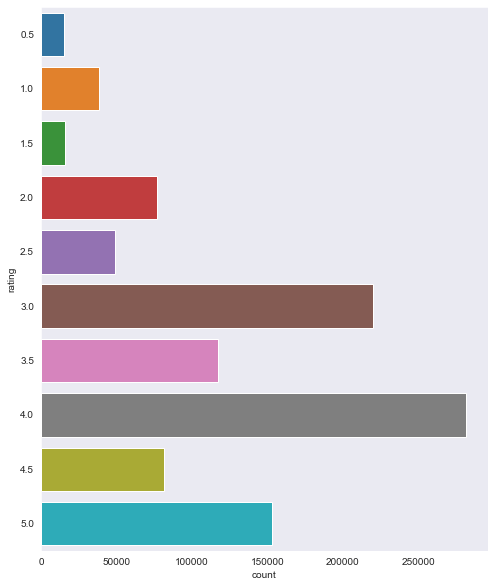

In [42]:
plt.figure(figsize=(8,10))
x = sns.countplot(y='rating',data=df)

<span style='background:yellow'>HISTOGRAM</span> 


<AxesSubplot:>

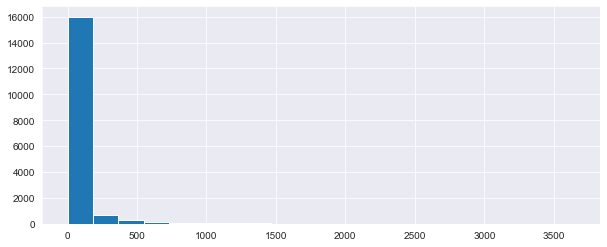

In [28]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=20) #bins is used for the width of bar

<AxesSubplot:>

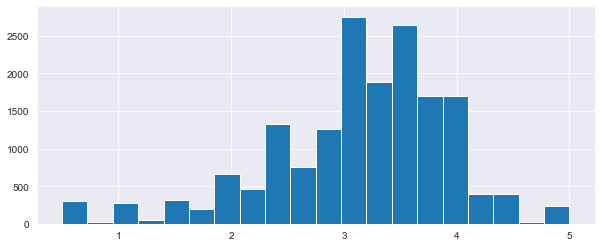

In [29]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=20)

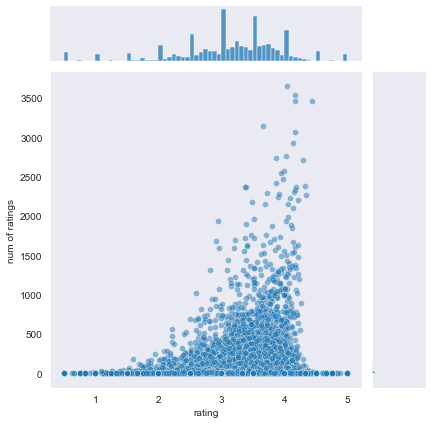

In [30]:
sns.jointplot(x='rating', y='num of ratings',data=ratings,alpha=0.5) #alpha shows the transparency(ranges 0-1)

In [48]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')

In [35]:
#ratings given by all user Id
ForestGump_user_ratings = moviemat['Forrest Gump (1994)']


In [36]:
#pairwise correlation between rows or columns
similar_to_ForestGump = moviemat.corrwith(ForestGump_user_ratings)

C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [37]:
#correlation with all the movies
corr_ForestGump = pd.DataFrame(similar_to_ForestGump, columns=['Correlation']) 
corr_ForestGump.dropna(inplace=True) #dropna is used for filtering NAN values


<span style='background:yellow'>CORRELATION WITH THE MOVIES</span>

In [38]:
corr_ForestGump.sort_values('Correlation',ascending=False)

,Correlation
title,
Search and Destroy (1995),1.0
Hellsinki (RÃ¶Ã¶peri) (2009),1.0
"Man from London, The (A Londoni fÃ©rfi) (2007)",1.0
Mighty Peking Man (a.k.a. Goliathon) (Xing xing wang) (1977),1.0
Last of the Dogmen (1995),1.0
...,...
Troll (1986),-1.0
Our Family Wedding (2010),-1.0
"Magic of MÃ©liÃ¨s, The (magie MÃ©liÃ¨s, La) (1997)",-1.0


In [40]:
corr_ForestGump=corr_ForestGump.join(ratings['num of ratings'])

<span style = 'background:yellow'>RECOMMENDED MOVIES</span>

In [47]:
corr_ForestGump.head(10)[corr_ForestGump.head(10)['num of ratings']>5].sort_values('Correlation',ascending=False)


,Correlation,num of ratings
title,,
"""Great Performances"" Cats (1998)",0.993399,9
'71 (2014),0.718750,7
'Til There Was You (1997),0.389576,33
(500) Days of Summer (2009),0.218586,379
"'burbs, The (1989)",0.126920,143
'night Mother (1986),-0.467707,10
'Round Midnight (1986),-0.537086,10
(Untitled) (2009),-0.639010,7
